In [1]:
test_path = '/work/bb1153/b381993/data/FINAL_VERSION_new/test_dataset.csv'
train_path = '/work/bb1153/b381993/data/FINAL_VERSION_new/train_dataset.csv'

In [2]:
import pandas as pd
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

In [28]:
from sklearn.linear_model import HuberRegressor, Lasso, LinearRegression
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import RobustScaler

In [4]:
scaler = RobustScaler()

In [2]:
import numpy as np
np.arange(10,15)

array([10, 11, 12, 13, 14])

In [5]:
features = [col for col in df_test.columns if ('time_0' in col or 'time_1' in col or 'time_2' in col)]
target = ['y_max_extend']

In [35]:
X_train = df_train[features]
X_train = scaler.fit_transform(X_train)
y_train = df_train[target]
X_test = scaler.transform(df_test[features])
y_test = df_test[target]

In [36]:
# Feature selection using RFE
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import RFE
estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=200, step=3, verbose=True)
selector = selector.fit(X_train, y_train)

Fitting estimator with 285 features.
Fitting estimator with 282 features.
Fitting estimator with 279 features.
Fitting estimator with 276 features.
Fitting estimator with 273 features.
Fitting estimator with 270 features.
Fitting estimator with 267 features.
Fitting estimator with 264 features.
Fitting estimator with 261 features.
Fitting estimator with 258 features.
Fitting estimator with 255 features.
Fitting estimator with 252 features.
Fitting estimator with 249 features.
Fitting estimator with 246 features.
Fitting estimator with 243 features.
Fitting estimator with 240 features.
Fitting estimator with 237 features.
Fitting estimator with 234 features.
Fitting estimator with 231 features.
Fitting estimator with 228 features.
Fitting estimator with 225 features.
Fitting estimator with 222 features.
Fitting estimator with 219 features.
Fitting estimator with 216 features.
Fitting estimator with 213 features.
Fitting estimator with 210 features.
Fitting estimator with 207 features.
F

In [37]:
import numpy as np
id_cols = np.where(selector.support_)[0]

In [38]:
# Get the selected features
X_train_sel = X_train[:,id_cols]
X_test_sel = X_test[:,id_cols]

In [39]:
model = MLPRegressor(hidden_layer_sizes=(100,100,20), activation = 'relu', verbose=True, early_stopping=True, n_iter_no_change=15)
model.fit(X_train_sel, y_train)

/home/b/b381993/miniconda3/envs/pytorch2/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:1623: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Iteration 1, loss = 1698.71167860
Validation score: 0.160747
Iteration 2, loss = 622.20361102
Validation score: 0.291343
Iteration 3, loss = 556.82801214
Validation score: 0.336047
Iteration 4, loss = 529.03473733
Validation score: 0.358949
Iteration 5, loss = 512.34666626
Validation score: 0.381692
Iteration 6, loss = 501.30036452
Validation score: 0.378783
Iteration 7, loss = 494.37211000
Validation score: 0.393401
Iteration 8, loss = 490.03167550
Validation score: 0.393200
Iteration 9, loss = 485.04870630
Validation score: 0.395585
Iteration 10, loss = 484.03674507
Validation score: 0.399637
Iteration 11, loss = 477.68945244
Validation score: 0.401477
Iteration 12, loss = 475.80699670
Validation score: 0.409675
Iteration 13, loss = 471.51595456
Validation score: 0.401768
Iteration 14, loss = 470.62427403
Validation score: 0.397581
Iteration 15, loss = 467.66433770
Validation score: 0.405891
Iteration 16, loss = 465.48071788
Validation score: 0.406741
Iteration 17, loss = 465.0914664

MLPRegressor(early_stopping=True, hidden_layer_sizes=(100, 100, 20),
             n_iter_no_change=15, verbose=True)

In [41]:
test_preds = model.predict(X_test_sel)
train_preds = model.predict(X_train_sel)

In [57]:
len(test_preds)

17229

PearsonRResult(statistic=array([0.6312824432096402], dtype=object), pvalue=0.0)

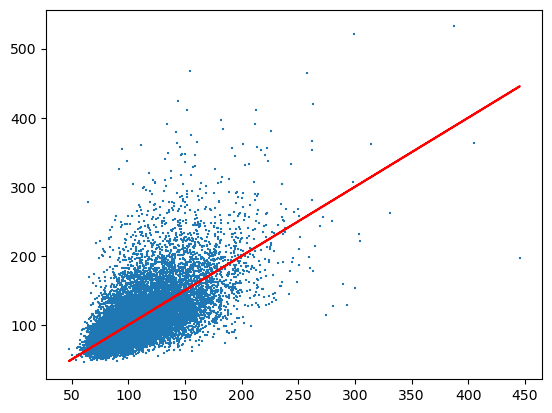

In [60]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
plt.scatter(test_preds, y_test.values,marker='+', s=1)
plt.plot(test_preds, test_preds, color='red')
pearsonr(test_preds, y_test.values)

PearsonRResult(statistic=array([0.6824048108610982], dtype=object), pvalue=0.0)

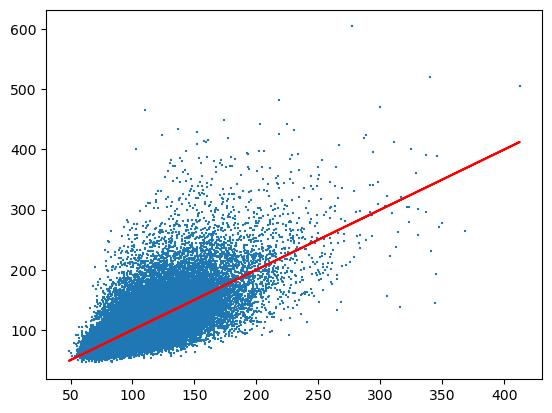

In [51]:
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
plt.scatter(train_preds, y_train, marker = '+',s=1)
plt.plot(train_preds, train_preds, color='red')
pearsonr(train_preds, y_train)